In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

races.csv
Each line describes the condition of an individual race.

race_id - unique identifier for the race

date - date of the race, in YYYY-MM-DD format (note that the dates given have been obscured and are not the real ones, although the durations between each race should be correct)

venue - a 2-character string, representing which of the 2 race courses this race took place at: ST = Shatin, HV = Happy Valley

race_no - race number of the race in the day's meeting

config - race track configuration, mostly related to the position of the inside rail. For more details, see the HKJC website.

surface - a number representing the type of race track surface: 1 = dirt, 0 = turf

distance - distance of the race, in metres

going - track condition. For more details, see the HKJC website.

horse_ratings - the range of horse ratings that may participate in this race

prize - the winning prize, in HK Dollars

race_class - a number representing the class of the race

sec_time1 - time taken by the leader of the race to reach the end of the end of the 1st sectional point (sec)

sec_time2 - time taken by the leader of the race to reach the end of the 2nd sectional point (sec)

sec_time3 - time taken by the leader of the race to reach the end of the 3rd sectional point (sec)

sec_time4 - time taken by the leader of the race to reach the end of the 4th sectional point, if any (sec)

sec_time5 - time taken by the leader of the race to reach the end of the 5th sectional point, if any (sec)

sec_time6 - time taken by the leader of the race to reach the end of the fourth sectional point, if any (sec)

sec_time7 - time taken by the leader of the race to reach the end of the fourth sectional point, if any (sec)

time1 - time taken by the leader of the race in the 1st section only (sec)

time2 - time taken by the leader of the race in the 2nd section only (sec)

time3 - time taken by the leader of the race in the 3rd section only (sec)

time4 - time taken by the leader of the race in the 4th section only, if any (sec)

time5 - time taken by the leader of the race in the 5th section only, if any (sec)

time6 - time taken by the leader of the race in the 6th section only, if any (sec)

time7 - time taken by the leader of the race in the 7th section only, if any (sec)

place_combination1 - placing horse no (1st)

place_combination2 - placing horse no (2nd)

place_combination3 - placing horse no (3rd)

place_combination4 - placing horse no (4th)

placedividend1 - placing dividend paid (for placecombination1)

placedividend2 - placing dividend paid (for placecombination2)

placedividend3 - placing dividend paid (for placecombination2)

placedividend4 - placing dividend paid (for placecombination2)

win_combination1 - winning horse no

windividend1 - winning dividend paid (for wincombination1)

win_combination2 - joint winning horse no, if any

windividend2 - winning dividend paid (for wincombination2, if any)

runs.csv
Each line describes the characteristics of one horse run, in one of the races given in races.csv.

race_id - unique identifier for the race

horse_no - the number assigned to this horse, in the race

horse_id - unique identifier for this horse

result - finishing position of this horse in the race

won - whether horse won (1) or otherwise (0)

lengths_behind - finishing position, as the number of horse lengths behind the winner

horse_age - current age of this horse at the time of the race

horse_country - country of origin of this horse

horse_type - sex of the horse, e.g. 'Gelding', 'Mare', 'Horse', 'Rig', 'Colt', 'Filly'

horse_rating - rating number assigned by HKJC to this horse at the time of the race

horse_gear - string representing the gear carried by the horse in the race. An explanation of the codes used may be found on the HKJC website.

declared_weight - declared weight of the horse and jockey, in lbs

actual_weight - actual weight carried by the horse, in lbs

draw - post position number of the horse in this race

position_sec1 - position of this horse (ranking) in section 1 of the race

position_sec2 - position of this horse (ranking) in section 2 of the race

position_sec3 - position of this horse (ranking) in section 3 of the race

position_sec4 - position of this horse (ranking) in section 4 of the race, if any

position_sec5 - position of this horse (ranking) in section 5 of the race, if any

position_sec6 - position of this horse (ranking) in section 6 of the race, if any

behind_sec1 - position of this horse (lengths behind leader) in section 1 of the race

behind_sec2 - position of this horse (lengths behind leader) in section 2 of the race

behind_sec3 - position of this horse (lengths behind leader) in section 3 of the race

behind_sec4 - position of this horse (lengths behind leader) in section 4 of the race, if any

behind_sec5 - position of this horse (lengths behind leader) in section 5 of the race, if any

behind_sec6 - position of this horse (lengths behind leader) in section 6 of the race, if any

time1 - time taken by the horse to pass through the 1st section of the race (sec)

time2 - time taken by the horse to pass through the 2nd section of the race (sec)

time3 - time taken by the horse to pass through the 3rd section of the race (sec)

time4 - time taken by the horse to pass through the 4th section of the race, if any (sec)

time5 - time taken by the horse to pass through the 5th section of the race, if any (sec)

time6 - time taken by the horse to pass through the 6th section of the race, if any (sec)

finish_time - finishing time of the horse in this race (sec)

win_odds - win odds for this horse at start of race

place_odds - place (finishing in 1st, 2nd or 3rd position) odds for this horse at start of race

trainer_id - unique identifier of the horse's trainer at the time of the race

jockey_id - unique identifier of the jockey riding the horse in this race

In [3]:
races = pd.read_csv('races.csv')
pd.set_option('display.max_columns', None)
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,sec_time5,sec_time6,sec_time7,time1,time2,time3,time4,time5,time6,time7,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,NaN,NaN,NaN,NaN,24.05,46.69,70.39,NaN,NaN,NaN,NaN,5,13,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,4,13.77,22.22,24.88,22.82,NaN,NaN,NaN,13.77,35.99,60.87,83.69,NaN,NaN,NaN,11,1,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,1,24.33,22.47,22.09,NaN,NaN,NaN,NaN,24.33,46.80,68.89,NaN,NaN,NaN,NaN,5,3,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,4,25.45,23.52,23.31,23.56,NaN,NaN,NaN,25.45,48.97,72.28,95.84,NaN,NaN,NaN,2,10,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [4]:
runs= pd.read_csv('runs.csv')
pd.set_option('display.max_columns', None)
runs.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,6,4,6,10.0,NaN,NaN,2.00,2.00,1.50,8.00,NaN,NaN,13.85,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,12,13,13,8.0,NaN,NaN,6.50,9.00,5.00,5.75,NaN,NaN,14.57,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3,2,2,7.0,NaN,NaN,1.00,1.00,0.75,4.75,NaN,NaN,13.69,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,8,8,11,9.0,NaN,NaN,3.50,5.00,3.50,6.25,NaN,NaN,14.09,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,13,12,12,6.0,NaN,NaN,7.75,8.75,4.25,3.75,NaN,NaN,14.77,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [5]:
horse = pd.merge(races, runs, on='race_id')
pd.set_option('display.max_columns', None)
horse.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,sec_time5,sec_time6,sec_time7,time1_x,time2_x,time3_x,time4_x,time5_x,time6_x,time7,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1_y,time2_y,time3_y,time4_y,time5_y,time6_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,1,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,6,4,6,10.0,NaN,NaN,2.00,2.00,1.50,8.00,NaN,NaN,13.85,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,12,13,13,8.0,NaN,NaN,6.50,9.00,5.00,5.75,NaN,NaN,14.57,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,3,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3,2,2,7.0,NaN,NaN,1.00,1.00,0.75,4.75,NaN,NaN,13.69,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,4,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,8,8,11,9.0,NaN,NaN,3.50,5.00,3.50,6.25,NaN,NaN,14.09,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,5,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,13,12,12,6.0,NaN,NaN,7.75,8.75,4.25,3.75,NaN,NaN,14.77,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [6]:
horse.columns

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6',
       'sec_time7', 'time1_x', 'time2_x', 'time3_x', 'time4_x', 'time5_x',
       'time6_x', 'time7', 'place_combination1', 'place_combination2',
       'place_combination3', 'place_combination4', 'place_dividend1',
       'place_dividend2', 'place_dividend3', 'place_dividend4',
       'win_combination1', 'win_dividend1', 'win_combination2',
       'win_dividend2', 'horse_no', 'horse_id', 'result', 'won',
       'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'position_sec1', 'position_sec2', 'position_sec3',
       'position_sec4', 'position_sec5', 'position_sec6', 'behind_sec1',
       'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5',
       'behind_sec6', '

In [7]:
horse['venue'].value_counts()

ST    51946
HV    27501
Name: venue, dtype: int64

In [8]:
horse['distance'].value_counts()

1200    24697
1400    14565
1650    13253
1000     8524
1600     8329
1800     7320
2000     1463
2200     1034
2400      262
Name: distance, dtype: int64

In [9]:
horse['going'].value_counts()

GOOD                51389
GOOD TO FIRM        20410
GOOD TO YIELDING     4131
YIELDING             1082
FAST                  878
WET SLOW              771
WET FAST              247
SLOW                  187
YIELDING TO SOFT      177
SOFT                  175
Name: going, dtype: int64

In [10]:
horse['prize'].value_counts()

850000.0     6983
625000.0     4607
800000.0     3746
760000.0     3590
725000.0     3561
             ... 
6600000.0      20
1600000.0      17
1398000.0      12
1272000.0      12
1482000.0      11
Name: prize, Length: 71, dtype: int64

In [11]:
horse['horse_ratings'].value_counts()

60-40      27852
80-60      22401
40-15       5206
100-80      5109
G           3474
40-0        3460
40-10       2434
85-60       2394
105-80      1884
65-40        802
95-75        718
110-85       531
60-35        472
115-90       423
90+          327
40-20        309
90-70        270
95+          259
110-90       247
80-55        157
100+         134
115-95       130
100-75       127
120-95        97
75-55         56
80+           55
120-100       39
85+           36
105-85        24
95-70         14
110-80         6
Name: horse_ratings, dtype: int64

In [12]:
#horse_rating - rating number assigned by HKJC to this horse at the time of the race
horse['horse_rating'].value_counts()
#redundant need dropping
#horse_ratings - the range of horse ratings that may participate in this race
#race_class - a number representing the class of the race

60     52343
52      1436
65       685
50       630
67       618
       ...  
138        3
10         3
11         2
136        1
132        1
Name: horse_rating, Length: 125, dtype: int64

In [13]:
horse['horse_id'].nunique

<bound method IndexOpsMixin.nunique of 0        3917
1        2157
2         858
3        1853
4        2796
         ... 
79442    1238
79443     985
79444    3147
79445    1982
79446    3491
Name: horse_id, Length: 79447, dtype: int64>

In [14]:
# a lot of nans as -- need to be dropped
horse['horse_gear'].value_counts()

--               57373
B                 3579
TT                2973
TT/B              2733
H                 1360
                 ...  
TT/XB/V1             1
TT-/B-/H-/SR1        1
SR-/XB/B1            1
TT/P-/H/XB           1
TT/H/SR/CP1          1
Name: horse_gear, Length: 822, dtype: int64

In [15]:
# 1 = dirt, 0 = turf
horse['surface'].value_counts()

0    70798
1     8649
Name: surface, dtype: int64

In [16]:
horse['config'].value_counts()

A      27587
C      14426
C+3    12373
B       9794
B+2     7919
A+3     7348
Name: config, dtype: int64

In [17]:
horse_cleaned = horse.copy()

#add 'horse_no' when finished michael********

drop_cols = ['horse_ratings','horse_gear', 'place_combination1', 'place_combination2',
             'place_combination3', 'place_combination4','place_dividend1', 'place_dividend2', 
             'place_dividend3', 'place_dividend4', 'sec_time1', 'sec_time2', 'sec_time3', 'sec_time4',
             'sec_time5', 'sec_time6', 'sec_time7', 'time1_x', 'time2_x', 'time3_x', 'time4_x', 
             'time5_x', 'time6_x', 'time7','horse_ratings', 'race_class', 'time4_y', 'time5_y',
             'time6_y', 'win_combination1', 'win_dividend1', 'win_combination2', 'win_dividend2',
             'position_sec1', 'position_sec2', 'position_sec3','position_sec4', 'position_sec5', 
             'position_sec6', 'behind_sec1', 'behind_sec2', 'behind_sec3', 'behind_sec4', 
             'behind_sec5', 'behind_sec6']

horse_cleaned = horse_cleaned.drop(columns=drop_cols)
display(horse_cleaned.columns)
pd.set_option('display.max_columns', None)
horse_cleaned.head(3)

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'prize', 'horse_no', 'horse_id', 'result', 'won',
       'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'declared_weight', 'actual_weight', 'draw', 'time1_y',
       'time2_y', 'time3_y', 'finish_time', 'win_odds', 'place_odds',
       'trainer_id', 'jockey_id'],
      dtype='object')

,race_id,date,venue,race_no,config,surface,distance,going,prize,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,time1_y,time2_y,time3_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,1020.0,133,7,13.85,21.59,23.86,83.92,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,980.0,133,12,14.57,21.99,23.30,83.56,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,3,858,7,0.0,4.75,3,NZ,Gelding,60,1082.0,132,8,13.69,21.59,23.90,83.40,3.5,1.5,137,18


In [18]:
horse_cleaned.shape

(79447, 29)

In [66]:
horse_cleaned.horse_id.nunique()

4215

In [19]:
horse_cleaned.isna().mean().sort_values(ascending=False).head()


prize            0.073621
place_odds       0.047012
horse_type       0.000025
horse_country    0.000025
jockey_id        0.000000
dtype: float64

In [20]:
#only a small amt of data is nan so just going to drop it
horse_cleaned =horse_cleaned.dropna()

In [21]:
horse_cleaned.shape

(69861, 29)

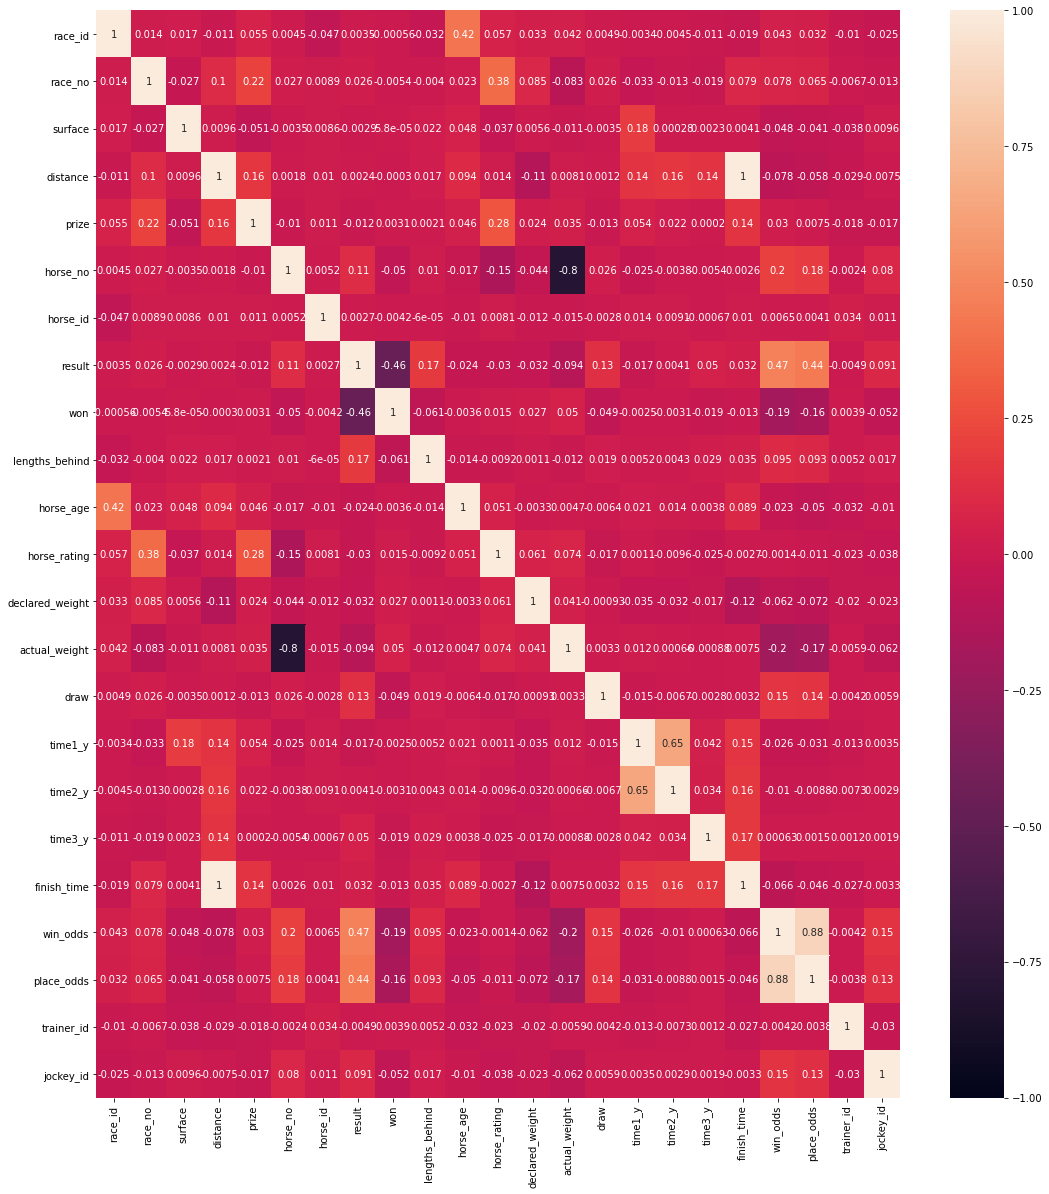

In [22]:
plt.figure(figsize=(18,20))
sns.heatmap(horse_cleaned.corr(), vmin=-1, vmax=1, annot=True)

In [23]:
#error lookup/ask adam
#print_vif(horse_cleaned)

In [24]:
horse_cleaned.dtypes

race_id              int64
date                object
venue               object
race_no              int64
config              object
surface              int64
distance             int64
going               object
prize              float64
horse_no             int64
horse_id             int64
result               int64
won                float64
lengths_behind     float64
horse_age            int64
horse_country       object
horse_type          object
horse_rating         int64
declared_weight    float64
actual_weight        int64
draw                 int64
time1_y            float64
time2_y            float64
time3_y            float64
finish_time        float64
win_odds           float64
place_odds         float64
trainer_id           int64
jockey_id            int64
dtype: object

In [25]:
horse_cleaned['going'].value_counts()

GOOD                45306
GOOD TO FIRM        17779
GOOD TO YIELDING     3690
YIELDING              930
FAST                  819
WET SLOW              747
WET FAST              247
SLOW                  187
YIELDING TO SOFT      112
SOFT                   44
Name: going, dtype: int64

In [26]:
surf= horse_cleaned.groupby('surface')
surf.head()

,race_id,date,venue,race_no,config,surface,distance,going,prize,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,time1_y,time2_y,time3_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,1020.0,133,7,13.85,21.59,23.86,83.92,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,980.0,133,12,14.57,21.99,23.30,83.56,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,3,858,7,0.0,4.75,3,NZ,Gelding,60,1082.0,132,8,13.69,21.59,23.90,83.40,3.5,1.5,137,18
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,1118.0,127,13,14.09,21.83,23.70,83.62,39.0,11.0,80,59
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,485000.0,5,2796,6,0.0,3.75,3,GB,Gelding,60,972.0,131,14,14.77,21.75,23.22,83.24,50.0,14.0,9,154
260,21,1997-06-08,ST,4,A,1,1200,GOOD,625000.0,1,1677,3,0.0,3.00,3,NZ,Gelding,60,1219.0,133,8,24.94,22.47,22.78,70.19,14.0,3.4,9,183
261,21,1997-06-08,ST,4,A,1,1200,GOOD,625000.0,2,3438,4,0.0,3.75,3,NZ,Gelding,60,1044.0,129,6,24.50,22.23,23.60,70.33,8.3,1.8,47,162
262,21,1997-06-08,ST,4,A,1,1200,GOOD,625000.0,3,3132,6,0.0,5.75,3,AUS,Brown,60,1094.0,131,3,24.30,22.31,24.03,70.64,12.0,3.3,164,57
263,21,1997-06-08,ST,4,A,1,1200,GOOD,625000.0,4,1441,7,0.0,7.50,3,NZ,Gelding,60,1098.0,127,7,24.34,22.55,24.03,70.92,46.0,11.0,54,34
264,21,1997-06-08,ST,4,A,1,1200,GOOD,625000.0,5,4317,1,1.0,0.00,3,AUS,Gelding,60,1154.0,129,9,23.98,22.11,23.64,69.73,7.0,2.0,109,145


In [27]:
# Mapping Ordinal Categories to Integers
#ordinal_mappers = {
#    'surface': {
#        'dirt': 1,
#        'turf': 0,
#    },
#    'going' : {
#        'GOOD TO FIRM': 1,
#        'GOOD ': 2,
#        'GOOD TO YIELDING ' : 3,
#        'Good To Yielding' : 4,
#        '': 5
#        '':
#        '':
#        '':
#        '':
#        '':
#   
#for col_name, ordinal_map in ordinal_mappers.items():
#    df[col_name] = df[col_name].replace(ordinal_map)

In [28]:
num_cols = horse_cleaned.select_dtypes("number").columns

In [29]:
num_cols

Index(['race_id', 'race_no', 'surface', 'distance', 'prize', 'horse_no',
       'horse_id', 'result', 'won', 'lengths_behind', 'horse_age',
       'horse_rating', 'declared_weight', 'actual_weight', 'draw', 'time1_y',
       'time2_y', 'time3_y', 'finish_time', 'win_odds', 'place_odds',
       'trainer_id', 'jockey_id'],
      dtype='object')

In [30]:
num_horse = horse_cleaned.select_dtypes("number")

In [31]:
num_horse = num_horse.drop(columns=['race_id','horse_no','won','prize','race_no'])

In [32]:
num_horse.head()

,surface,distance,horse_id,result,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,draw,time1_y,time2_y,time3_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1400,3917,10,8.00,3,60,1020.0,133,7,13.85,21.59,23.86,83.92,9.7,3.7,118,2
1,0,1400,2157,8,5.75,3,60,980.0,133,12,14.57,21.99,23.30,83.56,16.0,4.9,164,57
2,0,1400,858,7,4.75,3,60,1082.0,132,8,13.69,21.59,23.90,83.40,3.5,1.5,137,18
3,0,1400,1853,9,6.25,3,60,1118.0,127,13,14.09,21.83,23.70,83.62,39.0,11.0,80,59
4,0,1400,2796,6,3.75,3,60,972.0,131,14,14.77,21.75,23.22,83.24,50.0,14.0,9,154


In [33]:
num_horse.columns

Index(['surface', 'distance', 'horse_id', 'result', 'lengths_behind',
       'horse_age', 'horse_rating', 'declared_weight', 'actual_weight', 'draw',
       'time1_y', 'time2_y', 'time3_y', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id'],
      dtype='object')

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [35]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(num_horse)

In [36]:

scaler2 = StandardScaler()
scaled_s = scaler2.fit_transform(num_horse)

In [37]:
k=6

In [38]:
kmeans = KMeans(n_clusters=k, random_state=32)
kmeans.fit(scaled_s)

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler2.inverse_transform(centroids), columns=num_horse.columns)
centroids_df

,surface,distance,horse_id,result,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,draw,time1_y,time2_y,time3_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,2.585432e-14,1221.224273,2175.663507,6.054188,3.868071,3.265635,61.174427,1112.516886,123.377258,6.720247,18.771885,22.369714,23.354539,72.000618,17.357389,4.222769,81.531535,82.117125
1,1.000000e+00,1427.113260,2224.783287,6.582182,5.930863,3.445856,59.829144,1106.752210,122.776519,6.777072,24.824483,22.924094,23.870396,85.498316,20.950262,5.214434,74.213950,86.537845
2,2.184364e-14,1721.183276,2211.886144,6.275929,4.392228,3.407670,61.381119,1097.715742,123.209228,6.599336,23.532054,23.755980,24.608035,105.520480,17.899433,4.501586,79.398774,83.440721
3,3.616484e-02,1352.448369,2211.907579,10.324829,8.826829,3.197178,61.113447,1096.878216,120.215027,7.931782,20.259812,22.704503,23.779950,81.267748,89.828614,24.172498,78.845622,101.261564
4,1.730769e-01,1532.692308,2208.346154,12.788462,999.000000,3.019231,59.903846,1114.173077,122.884615,7.153846,22.157115,23.233077,25.430000,99.820962,57.376923,16.113462,89.211538,93.384615
5,0.000000e+00,1000.000000,4067.000000,12.000000,23.000000,3.000000,60.000000,1058.000000,111.000000,11.000000,999.000000,999.000000,23.720000,61.720000,99.000000,25.000000,29.000000,131.000000


In [39]:
horse_cleaned.columns

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'prize', 'horse_no', 'horse_id', 'result', 'won',
       'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'declared_weight', 'actual_weight', 'draw', 'time1_y',
       'time2_y', 'time3_y', 'finish_time', 'win_odds', 'place_odds',
       'trainer_id', 'jockey_id'],
      dtype='object')

won,0.0,1.0
label,,
0,27189,2984
1,6629,612
2,19722,1972
3,10672,28
4,52,0
5,1,0


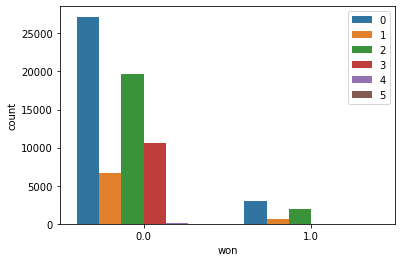

going,FAST,GOOD,GOOD TO FIRM,GOOD TO YIELDING,SLOW,SOFT,WET FAST,WET SLOW,YIELDING,YIELDING TO SOFT
label,,,,,,,,,,
0,0,19065,8806,1781,0,20,0,0,435,66
1,779,5345,0,0,178,0,233,706,0,0
2,0,14110,5807,1355,0,18,0,0,376,28
3,36,6757,3152,550,9,6,14,39,119,18
4,4,29,14,3,0,0,0,2,0,0
5,0,0,0,1,0,0,0,0,0,0


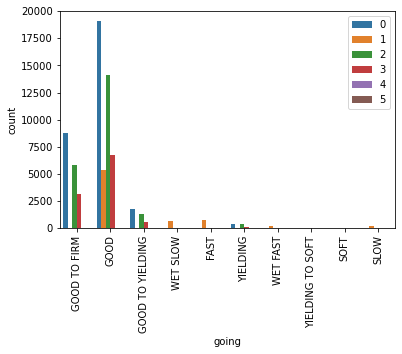

race_no,1,2,3,4,5,6,7,8,9,10,11
label,,,,,,,,,,,
0,3643,3566,3603,2968,3181,2996,2994,2564,2129,2018,511
1,829,773,726,957,742,925,726,825,421,219,98
2,2014,2113,1780,2693,2600,2574,2423,2883,1085,1162,367
3,799,1057,1171,972,1121,1144,1034,1021,989,1080,312
4,4,4,5,11,4,5,7,4,4,4,0
5,0,0,1,0,0,0,0,0,0,0,0


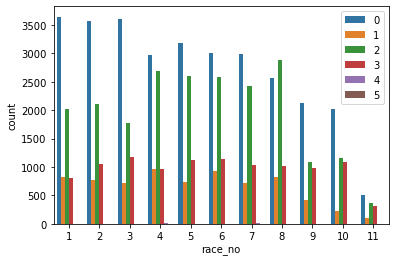

horse_country,ARG,AUS,BRZ,CAN,FR,GB,GER,GR,IRE,ITY,JPN,NZ,SAF,USA,ZIM
label,,,,,,,,,,,,,,,
0,20,13062,3,20,227,2327,34,18,3192,13,19,10427,300,510,1
1,19,2925,0,24,107,517,64,5,904,4,3,2153,42,474,0
2,38,6311,4,10,531,1969,191,0,3676,15,38,7966,135,808,2
3,31,3705,7,22,252,934,37,10,1618,24,13,3550,104,392,1
4,1,22,0,0,1,3,0,0,4,0,0,16,1,4,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


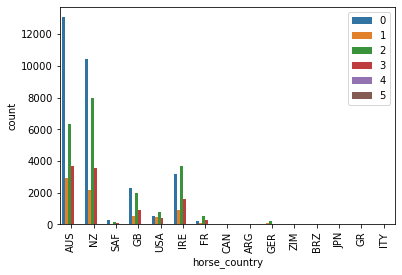

draw,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
label,,,,,,,,,,,,,,,
0,2548,2514,2538,2454,2469,2430,2386,2365,2279,2203,2065,1947,1054,920,1
1,594,586,589,582,572,581,575,575,569,565,544,515,209,185,0
2,1838,1831,1842,1806,1811,1774,1759,1729,1721,1657,1536,1407,529,454,0
3,565,613,582,711,696,748,800,837,870,927,1042,1009,645,655,0
4,0,3,3,5,6,7,4,6,7,4,3,1,1,2,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


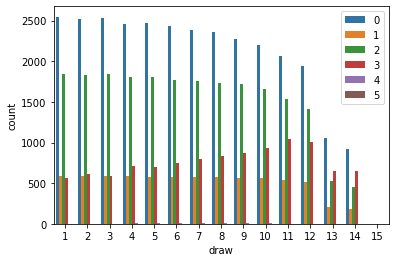

horse_age,2,3,4,5,6,7,8,9,10
label,,,,,,,,,
0,1221,23486,3001,1553,612,222,66,9,3
1,64,5436,795,545,251,109,31,7,3
2,138,16561,2475,1505,669,261,64,21,0
3,635,8621,660,405,262,96,21,0,0
4,2,49,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,0


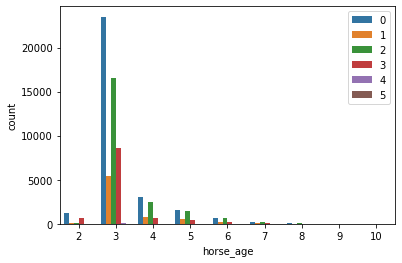

horse_type,Brown,Colt,Filly,Gelding,Grey,Horse,Mare,Rig,Roan
label,,,,,,,,,
0,703,117,13,28862,13,310,104,40,11
1,285,4,1,6856,1,48,15,8,23
2,486,70,11,20566,0,457,62,41,1
3,243,59,15,10163,3,146,31,34,6
4,5,0,0,45,0,0,2,0,0
5,0,0,0,1,0,0,0,0,0


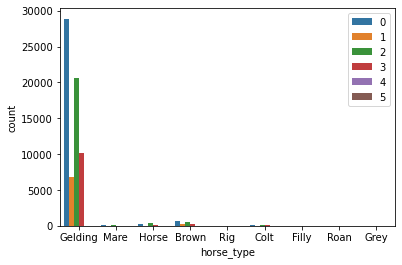

venue,HV,ST
label,,
0,10395,19778
1,0,7241
2,11581,10113
3,2300,8400
4,20,32
5,1,0


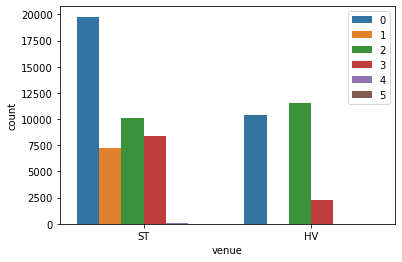

config,A,A+3,B,B+2,C,C+3
label,,,,,,
0,7842,3270,3837,3553,6113,5558
1,7241,0,0,0,0,0
2,6356,1945,3767,1904,4473,3249
3,2980,1379,967,1565,1936,1873
4,20,3,4,5,10,10
5,0,0,0,0,0,1


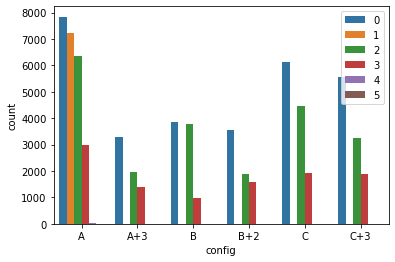

result,1,2,3,4,5,6,7,8,9,10,11,12,13,14
label,,,,,,,,,,,,,,
0,2984,2943,2920,2856,2749,2680,2536,2346,2179,1928,1686,1334,619,413
1,612,609,611,609,605,608,591,587,573,553,511,435,185,152
2,1972,1970,1954,1947,1916,1881,1835,1782,1687,1547,1410,1130,384,279
3,28,61,108,190,294,413,586,817,1030,1349,1573,1843,1236,1172
4,0,0,0,0,0,0,0,1,1,1,4,16,4,25
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0


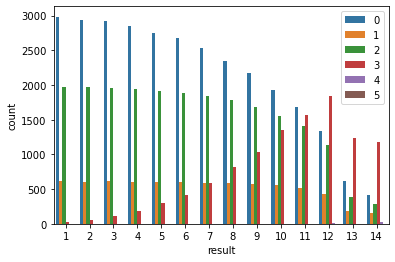

surface,0,1
label,,
0,30173,0
1,0,7241
2,21694,0
3,10314,386
4,43,9
5,1,0


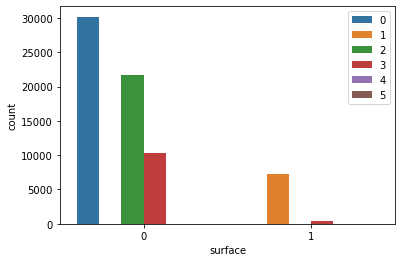

distance,1000,1200,1400,1600,1650,1800,2000,2200,2400
label,,,,,,,,,
0,6409,14153,9611,0,0,0,0,0,0
1,0,3826,0,0,2698,717,0,0,0
2,0,1,3,5932,8267,5229,1138,918,206
3,1244,3709,3025,1364,711,550,88,8,1
4,3,8,12,4,18,3,1,2,1
5,1,0,0,0,0,0,0,0,0


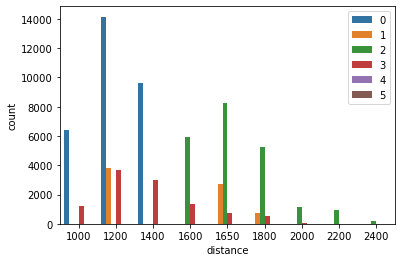

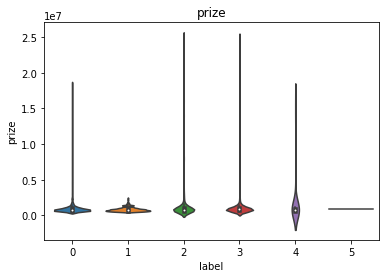

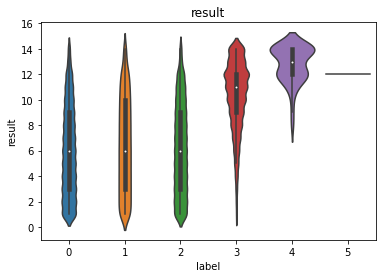

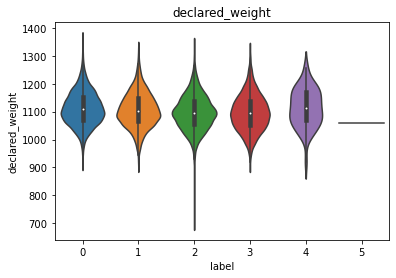

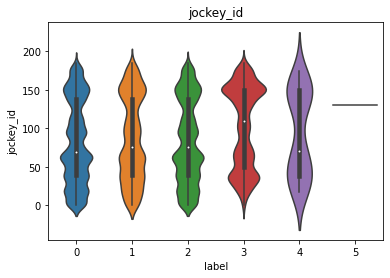

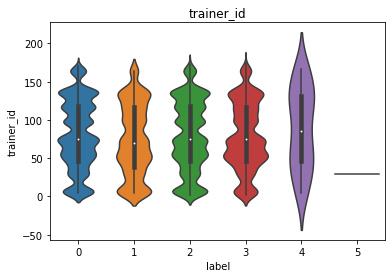

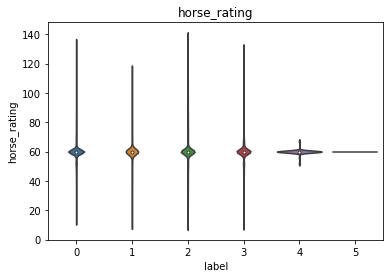

In [40]:
horse_cleaned["label"] = kmeans.labels_
pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["won"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("won", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["going"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("going", hue="label", data=horse_cleaned)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["race_no"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("race_no", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["horse_country"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("horse_country", hue="label", data=horse_cleaned)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["draw"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("draw", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["horse_age"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("horse_age", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["horse_type"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("horse_type", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["venue"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("venue", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()


pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["config"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("config", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()


pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["result"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("result", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["surface"])
display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("surface", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

pos_label_ct = pd.crosstab(horse_cleaned["label"], horse_cleaned["distance"])

display(pos_label_ct.style.background_gradient(axis=1))

sns.countplot("distance", hue="label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()

sns.violinplot("label","prize", data=horse_cleaned)
plt.title("prize")
plt.show()

sns.violinplot("label","result", data=horse_cleaned)
plt.title("result")
plt.show()

sns.violinplot("label","declared_weight", data=horse_cleaned)
plt.title("declared_weight")
plt.show()

sns.violinplot("label","jockey_id", data=horse_cleaned)
plt.title("jockey_id")
plt.show()

sns.violinplot("label","trainer_id", data=horse_cleaned)
plt.title("trainer_id")
plt.show()

sns.violinplot("label","horse_rating", data=horse_cleaned)
plt.title("horse_rating")
plt.show()


In [41]:
horse_cleaned['distance'].value_counts()

1200    21697
1400    12651
1650    11694
1000     7657
1600     7300
1800     6499
2000     1227
2200      928
2400      208
Name: distance, dtype: int64

In [42]:
f1000 = horse_cleaned.loc[horse_cleaned['distance'] == 1000]
f1200 = horse_cleaned.loc[horse_cleaned['distance'] == 1200]
f1400 = horse_cleaned.loc[horse_cleaned['distance'] == 1400]
f1600 = horse_cleaned.loc[horse_cleaned['distance'] == 1600]
f1650 = horse_cleaned.loc[horse_cleaned['distance'] == 1650]
f1800 = horse_cleaned.loc[horse_cleaned['distance'] == 1800]
f2000 = horse_cleaned.loc[horse_cleaned['distance'] == 2000]
f2200 = horse_cleaned.loc[horse_cleaned['distance'] == 2200]
f2400 = horse_cleaned.loc[horse_cleaned['distance'] == 2400]

In [71]:
horse_cleaned.groupby('label').won.sum() / horse_cleaned.groupby('label').won.count()

label
0    0.098896
1    0.084519
2    0.090901
3    0.002617
4    0.000000
5    0.000000
Name: won, dtype: float64

In [43]:


print(f1000.groupby('label').won.count())
print(f1000.groupby('label').won.sum() / f1000.groupby('label').won.count())

label
0    6409
3    1244
4       3
5       1
Name: won, dtype: int64
label
0    0.097987
3    0.000804
4    0.000000
5    0.000000
Name: won, dtype: float64


In [44]:

print(f1200.groupby('label').won.count())
print(f1200.groupby('label').won.sum() / f1200.groupby('label').won.count())

label
0    14153
1     3826
2        1
3     3709
4        8
Name: won, dtype: int64
label
0    0.100756
1    0.090173
2    0.000000
3    0.001887
4    0.000000
Name: won, dtype: float64


In [45]:

print(f1400.groupby('label').won.count())
print(f1400.groupby('label').won.sum() / f1400.groupby('label').won.count())

label
0    9611
2       3
3    3025
4      12
Name: won, dtype: int64
label
0    0.096764
2    0.000000
3    0.003306
4    0.000000
Name: won, dtype: float64


In [46]:

print(f1600.groupby('label').won.count())
print(f1600.groupby('label').won.sum() / f1600.groupby('label').won.count())

label
2    5932
3    1364
4       4
Name: won, dtype: int64
label
2    0.093223
3    0.004399
4    0.000000
Name: won, dtype: float64


In [47]:

print(f1650.groupby('label').won.count())
print(f1650.groupby('label').won.sum() / f1650.groupby('label').won.count())

label
1    2698
2    8267
3     711
4      18
Name: won, dtype: int64
label
1    0.078577
2    0.090964
3    0.004219
4    0.000000
Name: won, dtype: float64


In [48]:

print(f1800.groupby('label').won.count())
print(f1800.groupby('label').won.sum() / f1800.groupby('label').won.count())

label
1     717
2    5229
3     550
4       3
Name: won, dtype: int64
label
1    0.076709
2    0.089310
3    0.001818
4    0.000000
Name: won, dtype: float64


In [49]:

print(f2000.groupby('label').won.count())
print(f2000.groupby('label').won.sum() / f2000.groupby('label').won.count())

label
2    1138
3      88
4       1
Name: won, dtype: int64
label
2    0.086116
3    0.000000
4    0.000000
Name: won, dtype: float64


In [50]:

print(f2200.groupby('label').won.count())
print(f2200.groupby('label').won.sum() / f2200.groupby('label').won.count())

label
2    918
3      8
4      2
Name: won, dtype: int64
label
2    0.089325
3    0.000000
4    0.000000
Name: won, dtype: float64


In [51]:

print(f2400.groupby('label').won.count())
print(f2400.groupby('label').won.sum() / f2400.groupby('label').won.count())

label
2    206
3      1
4      1
Name: won, dtype: int64
label
2    0.097087
3    0.000000
4    0.000000
Name: won, dtype: float64


In [52]:
print(horse_cleaned.groupby('label').horse_age.mean())
print(f1000.horse_age.mean())
print(f1200.horse_age.mean())
print(f1400.horse_age.mean())
print(f1600.horse_age.mean())
print(f1650.horse_age.mean())
print(f1800.horse_age.mean())
print(f2000.horse_age.mean())
print(f2200.horse_age.mean())
print(f2400.horse_age.mean())

label
0    3.265635
1    3.445795
2    3.407670
3    3.197196
4    3.019231
5    3.000000
Name: horse_age, dtype: float64
3.2107875146924383
3.257685394294142
3.269860090111454
3.336986301369863
3.4285958611253635
3.4588398215110017
3.4881825590872046
3.4827586206896552
3.375


In [53]:
horse_cleaned.groupby('trainer_id').won.count().sort_values(ascending = False).head()

trainer_id
137    4201
75     4031
97     4030
47     3928
7      3643
Name: won, dtype: int64

In [54]:
t137 = horse_cleaned.loc[horse_cleaned['trainer_id'] == 137] 
t137['label'].value_counts() 

0    1964
2    1481
3     404
1     350
4       2
Name: label, dtype: int64

In [55]:
t75 = horse_cleaned.loc[horse_cleaned['trainer_id'] == 75] 
t75['label'].value_counts()

0    1719
2    1297
3     682
1     330
4       3
Name: label, dtype: int64

In [56]:
t97 = horse_cleaned.loc[horse_cleaned['trainer_id'] == 97] 
t97['label'].value_counts()

0    1743
2    1368
3     522
1     397
Name: label, dtype: int64

In [57]:
t47 = horse_cleaned.loc[horse_cleaned['trainer_id'] == 47] 
t47['label'].value_counts()

0    1633
2     920
3     822
1     548
4       5
Name: label, dtype: int64

In [58]:
t7 = horse_cleaned.loc[horse_cleaned['trainer_id'] == 7] 
t7['label'].value_counts()

0    1761
2    1323
1     363
3     195
4       1
Name: label, dtype: int64

In [59]:
horse_cleaned.groupby('jockey_id').won.count().sort_values(ascending = False)

jockey_id
2      4167
64     3866
18     3487
63     3376
34     3138
       ... 
108       1
35        1
29        1
33        1
89        1
Name: won, Length: 164, dtype: int64

In [60]:
j2 = horse_cleaned.loc[horse_cleaned['jockey_id'] == 2] 
j2['label'].value_counts()

0    2198
2    1521
1     421
3      27
Name: label, dtype: int64

In [61]:
j64 = horse_cleaned.loc[horse_cleaned['jockey_id'] == 64] 
j64['label'].value_counts()

0    1994
2    1355
1     385
3     129
4       3
Name: label, dtype: int64

In [62]:
j18 = horse_cleaned.loc[horse_cleaned['jockey_id'] == 18 ] 
j18['label'].value_counts()

0    1800
2    1210
1     377
3      98
4       2
Name: label, dtype: int64

In [63]:
j63 = horse_cleaned.loc[horse_cleaned['jockey_id'] == 63 ] 
j63['label'].value_counts()

0    1357
2    1038
3     639
1     338
4       4
Name: label, dtype: int64

In [64]:
j34 = horse_cleaned.loc[horse_cleaned['jockey_id'] == 34] 
j34['label'].value_counts()

0    1204
2     822
3     761
1     348
4       3
Name: label, dtype: int64

No handles with labels found to put in legend.


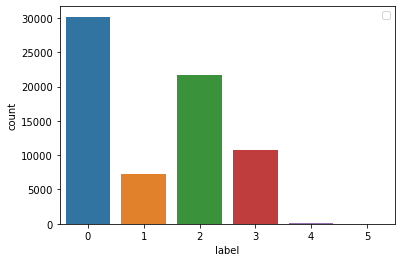

In [67]:
sns.countplot("label", data=horse_cleaned)
plt.legend(loc="upper right")
plt.show()


In [69]:
horse_cleaned.groupby('label').count()

,race_id,date,venue,race_no,config,surface,distance,going,prize,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,time1_y,time2_y,time3_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173,30173
1,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241
2,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694
3,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700,10700
4,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
